In [1]:
import gaussian_random_fields as gr
import random
import numpy as np

In [2]:
def random_data(N):
    coef = 10*np.random.rand(2) - 5
    return coef[0]*np.random.random((N,N)) + coef[1]

def random_selected_points(N):
    num = int(N/2)
    data = np.zeros((N,N))
    for _ in range(num):
        i = np.random.randint(N)
        j = np.random.randint(N)
        data[i][j] = (10*np.random.rand() - 5)*random.random()
    return data

def Gaussian_random_field(N):
    alpha = random.uniform(2.0,5.0)
    return gr.gaussian_random_field(alpha=alpha, size=N)

def trigonometric_function(xx, yy):
    '''
    xx, yy are grid point coordinates
    -1 < x, y < 1
    '''
    coef = 10*np.random.rand(3) - 5
    return coef[0]*np.sin(coef[1]*np.pi*xx)*np.sin(coef[2]*np.pi*yy)

def polynomial_function(xx, yy):
    '''
    xx, yy are grid point coordinates
    -1 < x, y < 1
    '''
    coef = 10*np.random.rand(4) - 5
    return coef[0]*xx**2+coef[1]*yy**2+coef[2]*xx*yy+coef[3]

def discontinuous_function(xx, yy):
    '''
    xx, yy are grid point coordinates
    -1 < x, y < 1
    '''
    x_size, y_size = xx.shape
    a = 20*np.random.random()-10
    b = 2*random.random()-1 # [-1,1)
    coef1 = 10*np.random.random((3,))-5
    coef2 = 10*np.random.random((3,))-5
    data = np.zeros_like(xx)
    for i in range(x_size):
        for j in range(y_size):
            if(a*xx[i][j]+b > yy[i][j]):
                data[i][j] = coef1[0]*np.sin(coef1[1]*np.pi*xx[i][j])*np.sin(coef1[2]*np.pi*yy[i][j])
            else:
                data[i][j] = coef2[0]*xx[i][j]**2+coef2[1]*yy[i][j]**2+coef2[2]*xx[i][j]*yy[i][j]
    return data

In [3]:
N = 2**5+1
x = np.linspace(-1,1,N, dtype=np.float32) 
y = np.linspace(-1,1,N, dtype=np.float32)
xx, yy = np.meshgrid(x, y, indexing='xy')

In [4]:
a = np.zeros((2,N,N))

In [5]:
a[0,:,:]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

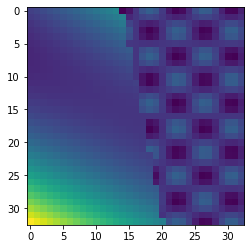

In [6]:
import matplotlib.pyplot as plt
data = discontinuous_function(xx, yy)
plt.imshow(data)

In [7]:
def main(N, n_train, n_test):
    '''N is the grid number along edges'''
    dataset = {}
    train_data = np.zeros((n_train, N, N))
    test_data = np.zeros((n_test, N, N))
    ntr, nte = int(n_train/6), int(n_test/6)

    # random data in whole field
    for i in range(ntr):
        train_data[i,:,:] = random_data(N)
    for j in range(nte):
        test_data[j,:,:] = random_data(N)
    
    # random selected points for whole field
    for i in range(ntr):
        train_data[ntr+i,:,:] = random_selected_points(N)
    for j in range(nte):
        test_data[nte+j,:,:] = random_selected_points(N)

    # Gaussian random field
    for i in range(ntr):
        train_data[2*ntr+i,:,:] = Gaussian_random_field(N)
    for j in range(nte):
        test_data[2*nte+j,:,:] = Gaussian_random_field(N)

    # trigonometric function w randomness
    x = np.linspace(-1,1,N, dtype=np.float32) 
    y = np.linspace(-1,1,N, dtype=np.float32)
    xx, yy = np.meshgrid(x, y, indexing='xy')
    for i in range(ntr):
        train_data[3*ntr+i,:,:] = trigonometric_function(xx, yy)
    for j in range(nte):
        test_data[3*nte+j,:,:] = trigonometric_function(xx, yy)

    # polynomial function w randomness
    for i in range(ntr):
        train_data[4*ntr+i,:,:] = polynomial_function(xx, yy)
    for j in range(nte):
        test_data[4*nte+j,:,:] = polynomial_function(xx, yy)

    # discontinuous function w randomness
    ntr1, nte1 = n_train-5*ntr, n_test-5*nte
    for i in range(ntr1):
        train_data[5*ntr+i,:,:] = discontinuous_function(xx, yy)
    for j in range(nte1):
        test_data[5*nte+j,:,:] = discontinuous_function(xx, yy)

    dataset['train'] = train_data
    dataset['test'] = test_data

    return dataset

In [8]:
dd = main(N, 1000, 200)

In [9]:
dd['train'].shape

(1000, 33, 33)

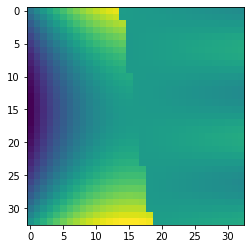

In [10]:
plt.imshow(dd['train'][928])

In [11]:
dd['test'].shape

(200, 33, 33)

In [12]:
import h5py
with h5py.File("test_data.h5", "w") as hf:
    for key, item in dd.items():
        hf[key] = item

In [24]:
h5 = h5py.File("poisson2d_rhs_16x16.h5", "r")
data = h5["train"]

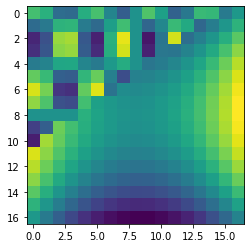

In [26]:
plt.imshow(data[900])